In [2]:
%matplotlib inline
import pandas as pd

# Cargar datos

Se carga un CSV con datos obtenidos de la pagina 'https://sites.google.com/site/yangdingqi/home/foursquare-dataset'

In [46]:
df = pd.read_table('dataset_ubicomp2013_checkins.txt', header=None, names=['user_id', 'venue_id'])
df.head()

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


In [47]:
df['checkin'] = 1

In [48]:
df.shape

(27149, 3)

In [49]:
len(df['user_id'].unique())

2060

In [50]:
#Verificar que existen duplicados
df.groupby(['user_id', 'venue_id']).count().sort_values('checkin', ascending=False).head()

,,checkin
user_id,venue_id,
51957,435580,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,41096,73


In [51]:
#Eliminar duplicados
df.drop_duplicates(inplace=True)

In [52]:
df.shape

(13472, 3)

# Transformar

In [53]:
df

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1
...,...,...,...
27141,173878,40,1
27144,2358,16020,1
27145,81275,13047,1
27146,67881,3298,1


In [54]:
#Ver cantidad de usuarios unicos
len(set(df['user_id']))

2060

In [55]:
#Cantidad de lugares unicos
len(set(df['venue_id']))


2876

A continuación se va a declarar una matriz, en la cual en las columnas se representara cada uno de los usuarios, y en las filas los lugares, el valor de cada elemento será un 1 si el usuario visitó ese lugar o un 0 si no lo ha hecho.

In [56]:
checkins_matrix = df.reset_index().pivot(index='venue_id', columns='user_id', values='checkin').fillna(0).astype(int)

In [57]:
checkins_matrix

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2232344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2302016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
checkins_matrix.shape

(2876, 2060)

In [59]:
#Muestra cuantos checkins tiene cada lugar
checkins_matrix.sum(axis=1)

venue_id
15          1
20         20
25         29
26          2
36         10
           ..
2167106     1
2232344     1
2302016     1
2376156     1
2422200     1
Length: 2876, dtype: int64

In [60]:
#Muestra cuantos checkins ha hecho cada usuario
checkins_matrix.sum().max()

88

# Visualización

In [61]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

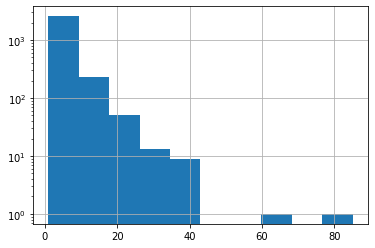

In [62]:
#Visualización logaritmica
checkins_matrix.sum(1).hist(log=True)

<AxesSubplot:>

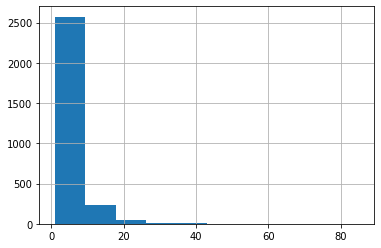

In [63]:
#Visualización normal
checkins_matrix.sum(1).hist()

In [64]:
ar = np.array(checkins_matrix)

In [65]:
ar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

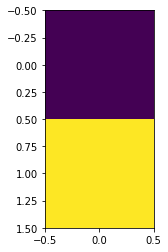

In [66]:
data = np.array([[0],[1]])
plt.imshow(data)

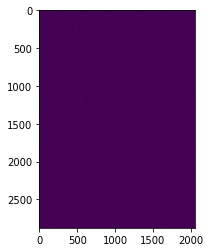

In [67]:
plt.imshow(ar)

# Computar similaridades

![jaccard](https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png)

In [68]:
def jaccard_similarity(venue_1, venue_2):
    """ Function to define a similarity using the Jaccard metric """
    venue_1_user_indices = set( venue_1[venue_1 > 0].index)
    venue_2_user_indices = set( venue_2[venue_2 > 0].index)
    intersection_v1_v2 = venue_1_user_indices.intersection(venue_2_user_indices)
    intersection_len = len(intersection_v1_v2)
    union_len = len( venue_1_user_indices.union(venue_2_user_indices) )
    return (intersection_len/union_len)

def compute_pairwise_jaccard_similarities(query_venue_index):
    """ Function that gives all the similarites of an specific venue using its index """
    query_venue = checkins_matrix.query(f'venue_id == {query_venue_index}')
    candidate_venues =  checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
    
    return pd.Series(similarities)


# Recomendación

Dado un restaurante que ha recibido a diferentes usuarios se va a comparar la similitud con algun otro restaurante basandose en la comparacion de las visitas de los usuarios usando la metrica de Jaccard.

In [70]:
#checkins_matrix

In [71]:
simil_tab = compute_pairwise_jaccard_similarities(25)

In [72]:
simil_tab.sort_values(ascending=False)

47540      0.250000
72623      0.250000
16625      0.076923
2422200    0.000000
11485      0.000000
             ...   
29164      0.000000
29121      0.000000
29101      0.000000
29092      0.000000
15         0.000000
Length: 2875, dtype: float64

In [73]:

#query_venue_index = int(input('Please enter a query venue index: '))
query_venue_index = 2167106
compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(7)



2422200    0.0
11214      0.0
11678      0.0
11664      0.0
11660      0.0
11655      0.0
11637      0.0
dtype: float64